<a href="https://colab.research.google.com/github/Kommmi/Stochastic-dynamical-systems/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!git clone https://github.com/Kommmi/Stochastic-dynamical-systems.git
!apt-get install texlive-latex-recommended dvipng texlive-latex-extra texlive-fonts-recommended -y
import os
from IPython.display import clear_output
import sys
os.chdir('Stochastic-dynamical-systems')
!pip install POT joblib
from Gamma import *
clear_output()
print("Module ready to go :)")
from Maps_1D import *
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib.pyplot

Module ready to go :)


### Tent Map

In [20]:
def plot_gamma_results(t_arr, ln_avg_dist, index_limits):
    """
    Plots the log-distance evolution and the linear fit.

    Args:
        t_arr (numpy.ndarray): Array of time steps.
        ln_avg_dist (numpy.ndarray): Array of average log distances.
        index_limits (tuple): Tuple of (start_index, end_index) for fitting.
        slope (float): The slope of the linear fit (Gamma).
        intercept (float): The intercept of the linear fit.
        r_value (float): The correlation coefficient of the linear fit.
    """
    i0, i1 = index_limits
    slope, intercept, r_value, _, _ = linregress(t_arr[i0:i1], ln_avg_dist[i0:i1])

    plt.figure(figsize=(5, 3))
    plt.rc('text', usetex=False)
    plt.rc('font', family='serif')

    plt.scatter(t_arr, ln_avg_dist, color='gray', alpha=0.5, label=r'$\langle \log(d_i/d_0) \rangle$')
    plt.plot(t_arr[i0:i1],
             slope * t_arr[i0:i1] + intercept,
             'g--',
             linewidth=2,
             label=fr'$\Gamma = {slope:.3f}$')

    plt.axvline(i0, color='purple', linestyle=':')
    plt.axvline(i1, color='purple', linestyle=':')
    plt.xlabel(r'$i$', fontsize=16)
    plt.ylabel(r'$\langle \log(d_i/d_0) \rangle$', fontsize=16)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    print(f"Γ (Gamma) = {slope:.4f},  R² = {r_value**2:.4f}")
    return slope

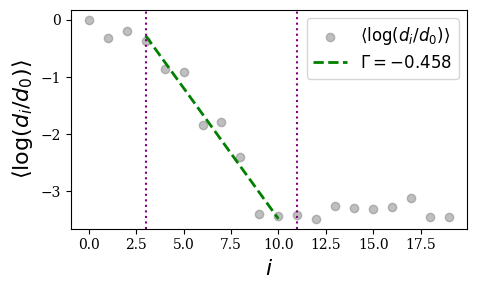

Γ (Gamma) = -0.4579,  R² = 0.9556


In [21]:

# ---------------------------------------------------------------------------
# 1. Parameters
# ---------------------------------------------------------------------------

a = 1.999                  # control parameter
Ns = 1_000_000             # number of samples
xmin, xmax = 0.0, 1.0    # domain bounds
traj_len = 20            # number of iterations
nits = 10                # ensemble repetitions
eps = 0.005              # perturbation amplitude
nbins = 50              # fixed number of histogram bins
index_limits = (3, 11)  # scaling region for fitting

# ---------------------------------------------------------------------------
# 2. Generate Initial Ensemble
# ---------------------------------------------------------------------------

x0s = Sampling_uniform(Ns, xmin, xmax)
params = (a,)

# ---------------------------------------------------------------------------
# 3. Compute Γ, log-distance evolution, and time array
# ---------------------------------------------------------------------------

Gamma_val, ln_avg_dist, t_arr = Gamma_SDE_1D_additive(
    Evolution_rule=tent_map,
    params=params,
    x0s=x0s,
    traj_len=traj_len,
    nits=nits,
    eps=eps,
    Bins_rule="Custom",
    custom_bins=nbins,
    index_limits=index_limits,
    rval=True
)

# ---------------------------------------------------------------------------
# 4. Fit and Plot Results
# ---------------------------------------------------------------------------
Gamma_val = plot_gamma_results(t_arr, ln_avg_dist, index_limits)

### Homogenous sine map

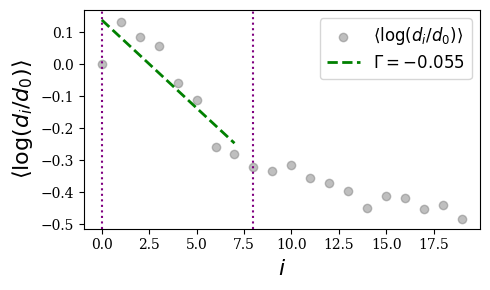

Γ (Gamma) = -0.0550,  R² = 0.7668


In [18]:
# ---------------------------------------------------------------------------
# 1. Parameters
# ---------------------------------------------------------------------------
a=0.64
csm_params = (a,)
Ns,xmin,xmax = 1_000_000, -1, 2
nbins = 100
nstep = 800
index_limits = (0, 8)  # scaling region for fitting


# ---------------------------------------------------------------------------
# 2. Generate Initial Ensemble
# ---------------------------------------------------------------------------
x0s = Sampling_uniform(Ns,xmin,xmax)
x0s = Evolve_1D_map(Chain_climbing_sine_map,csm_params,x0s,Bins_rule='Custom',custom_bins=nbins,T=nstep,show_plt=False)

# ---------------------------------------------------------------------------
# 3. Compute Γ, log-distance evolution, and time array
# ---------------------------------------------------------------------------

_, ln_avg_dist, t_arr = Gamma_SDE_1D_additive(
    Evolution_rule=Chain_climbing_sine_map,
    params=csm_params,
    x0s=x0s,
    traj_len=traj_len,
    nits=nits,
    eps=eps,
    Bins_rule="Custom",
    custom_bins=nbins,
    index_limits=index_limits,
    rval=True
)

# ---------------------------------------------------------------------------
# 4. Fit and Plot Results
# ---------------------------------------------------------------------------
Gamma_val = plot_gamma_results(t_arr, ln_avg_dist, index_limits)

### Heterogenous sine map

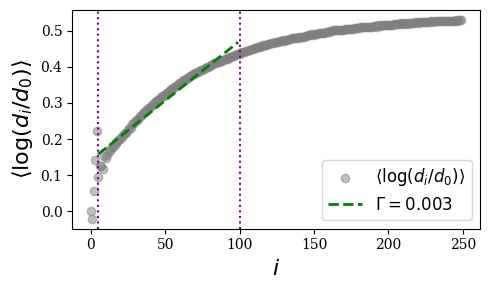

Γ (Gamma) = 0.0033,  R² = 0.9627


In [19]:
# ---------------------------------------------------------------------------
# 1. Parameters
# ---------------------------------------------------------------------------
a=0.9
hsm_params = (a,)
xmin_map, xmax_map =116,123
Ns,xmin,xmax = 1_000_000, 117, 119.5
nbins = 100
nstep = 400
xArr = [116.5, 119.2, 122]
traj_len,nits = 250,10
index_limits =(5, 100)
# ---------------------------------------------------------------------------
# 2. Generate Initial Ensemble
# ---------------------------------------------------------------------------
x0s = Sampling_uniform(Ns,xmin,xmax)
x0s = Evolve_1D_map(heterogenous_sine_map,hsm_params,x0s,Bins_rule='Custom',custom_bins=nbins,T=nstep,show_plt=False)
# ---------------------------------------------------------------------------
# 3. Compute Γ, log-distance evolution, and time array
# ---------------------------------------------------------------------------
_, ln_avg_dist, t_arr = Gamma_SDE_1D_additive(
    Evolution_rule=heterogenous_sine_map,
    params=hsm_params,
    x0s=x0s,
    traj_len=traj_len,
    nits=nits,
    eps=eps,
    Bins_rule="Custom",
    custom_bins=nbins,
    index_limits=index_limits,
    rval=True
)
# ---------------------------------------------------------------------------
# 4. Fit and Plot Results
# ---------------------------------------------------------------------------
Gamma_val = plot_gamma_results(t_arr, ln_avg_dist, index_limits)